In [1]:
import pandas as pd

df_train = pd.read_csv('./datasets/data_train.csv')
df_test = pd.read_csv('./datasets/data_test.csv')

In [2]:
df_train.head()

Year  BPM  Energy  Danceability  Loudness  Liveness  Valence  Length  \
0  2012  136      78            45        -4        67       24     187   
1  1971  134      32            28       -17        11       14    1412   
2  2007   93      93            44        -3         8       40     203   
3  2014   93      48            74        -9        11       36     285   
4  2004  117      75            61        -9        39       97     394   

   Acousticness  Speechiness  Popularity  genre_0  genre_1  genre_2  genre_3  \
0            11            6          73        0        0        1        0   
1            37            4          58        1        0        0        0   
2             1            5          62        0        0        0        0   
3             3            4          73        0        1        0        0   
4             1            3          49        0        0        0        0   

   genre_4  genre_5  genre_6  genre_7  
0        0        0        0        0  
1        0        0        0        0  
2        0        1        0        0  
3        0        0        0        0  
4        1        0        0        0

In [3]:
x_train = df_train.drop(columns=['Year'])
y_train = df_train['Year']

x_test = df_test.drop(columns=['Year'])
y_test = df_test['Year']

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

x_train.describe().T

count      mean       std  min       25%       50%       75%  max
0   1395.0  0.501775  0.166176  0.0  0.375000  0.494048  0.589286  1.0
1   1395.0  0.578314  0.231223  0.0  0.400000  0.600000  0.768421  1.0
2   1395.0  0.504476  0.176126  0.0  0.383721  0.511628  0.627907  1.0
3   1395.0  0.720401  0.144714  0.0  0.640000  0.760000  0.840000  1.0
4   1395.0  0.179839  0.177908  0.0  0.072917  0.104167  0.223958  1.0
5   1395.0  0.489277  0.257525  0.0  0.270833  0.468750  0.697917  1.0
6   1395.0  0.123729  0.076020  0.0  0.083969  0.109924  0.143511  1.0
7   1395.0  0.292758  0.292017  0.0  0.040816  0.183673  0.500000  1.0
8   1395.0  0.056861  0.084317  0.0  0.018868  0.037736  0.056604  1.0
9   1395.0  0.560367  0.164901  0.0  0.448276  0.586207  0.689655  1.0
10  1395.0  0.326165  0.468977  0.0  0.000000  0.000000  1.000000  1.0
11  1395.0  0.203584  0.402808  0.0  0.000000  0.000000  0.000000  1.0
12  1395.0  0.031541  0.174838  0.0  0.000000  0.000000  0.000000  1.0
13  1395.0  0.085305  0.279435  0.0  0.000000  0.000000  0.000000  1.0
14  1395.0  0.059498  0.236640  0.0  0.000000  0.000000  0.000000  1.0
15  1395.0  0.088889  0.284685  0.0  0.000000  0.000000  0.000000  1.0
16  1395.0  0.073835  0.261596  0.0  0.000000  0.000000  0.000000  1.0
17  1395.0  0.131183  0.337721  0.0  0.000000  0.000000  0.000000  1.0

# Models lineals
### Linear Regression

In [5]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


lr = LinearRegression().fit(x_train, y_train)
y_test_predicted_linear = lr.predict(x_test)
r2_lr_train = np.mean(cross_val_score(lr, x_train, y_train))
r2_lr_test = np.mean(cross_val_score(lr, x_test, y_test))

print(f'Train R2 score: {r2_lr_train}')
print(f'Test R2 score: {r2_lr_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_linear))))

Train R2 score: 0.3972139056223256
Test R2 score: 0.35197732146058297
Mitjana d'anys d'error: 12.774275966205206


In [6]:
from matplotlib import pyplot as plt
from yellowbrick.regressor import residuals_plot
import seaborn as sns

sns.set()
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

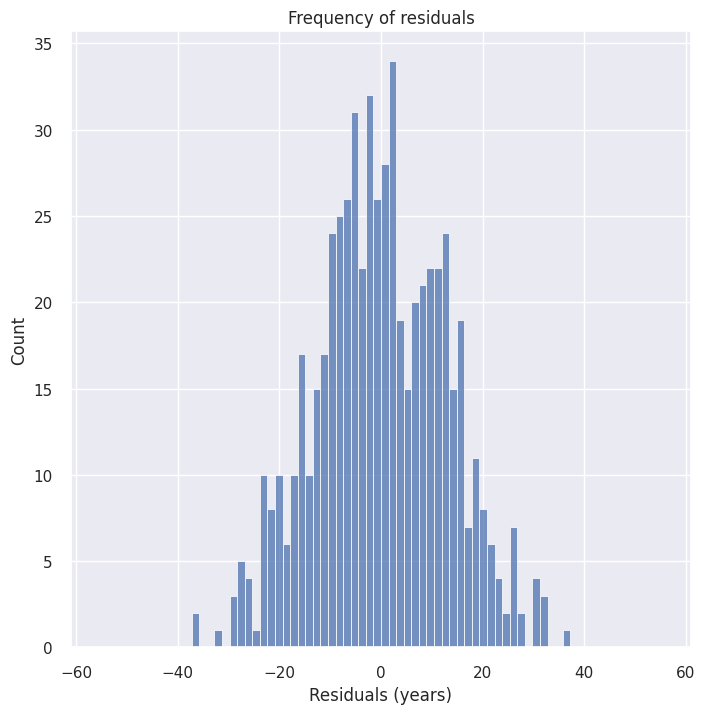

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([min(y_train)-max(y_train), max(y_train)-min(y_train)])
ax.set_title('Frequency of residuals')
ax.set_xlabel('Residuals (years)')
sns.histplot(y_test-y_test_predicted_linear, bins=50);

### Ridge

In [8]:
from sklearn.linear_model import RidgeCV


lambdas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10, 50, 100]

ridge_cv = RidgeCV(alphas=lambdas, cv=5).fit(x_train, y_train)
y_test_predicted_ridge = ridge_cv.predict(x_test)
r2_ridge_train = np.mean(cross_val_score(ridge_cv, x_train, y_train))
r2_ridge_test = np.mean(cross_val_score(ridge_cv, x_test, y_test))

print(f'Best lambda: {ridge_cv.alpha_}')
print(f'Train R2 score: {r2_ridge_train}')
print(f'Test R2 score: {r2_ridge_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_ridge))))

Best lambda: 0.5
Train R2 score: 0.3973912583536793
Test R2 score: 0.35471164346764206
Mitjana d'anys d'error: 12.784308805907546


In [9]:
plt.figure(figsize=(12,8));
viz = residuals_plot(ridge_cv, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### LASSO

In [10]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(alphas=lambdas, cv=5).fit(x_train, y_train)
y_test_predicted_lasso = lasso_cv.predict(x_test)
r2_lasso_train = np.mean(cross_val_score(lasso_cv, x_train, y_train))
r2_lasso_test = np.mean(cross_val_score(lasso_cv, x_test, y_test))

print(f'Best lambda: {ridge_cv.alpha_}')
print(f'Train R2 score: {r2_lasso_train}')
print(f'Test R2 score: {r2_lasso_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_lasso))))

Best lambda: 0.5
Train R2 score: 0.39687408865210205
Test R2 score: 0.3538238347889888
Mitjana d'anys d'error: 12.782918687093009


In [11]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lasso_cv, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### KNN

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from skopt import BayesSearchCV
np.int = int


param = {'n_neighbors':[1, 3, 5, 7, 11, 15, 20, 25], 
         'weights':['distance', 'uniform'], 
         'leaf_size':[1, 5, 10, 15, 20, 25, 30],
         'metric': ['l2', 'l1', 'cosine']}
niter = 15
cv = 5

knn = BayesSearchCV(KNeighborsRegressor(), param, n_iter=niter, 
                        cv=cv,
                        n_jobs=-1, 
                        refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_knn = knn.predict(x_test)
r2_knn_train = np.mean(cross_val_score(knn, x_train, y_train))
r2_knn_test = np.mean(cross_val_score(knn, x_test, y_test))

print(f'Train R2 score: {r2_knn_train}')
print(f'Test R2 score: {r2_knn_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_knn))))

Train R2 score: 0.38503385211654495
Test R2 score: 0.32311088280784933
Mitjana d'anys d'error: 12.654902393829142


In [14]:
plt.figure(figsize=(12,8));
viz = residuals_plot(knn, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### SVM Lineal

In [15]:
import warnings
from sklearn.svm import SVR
warnings.filterwarnings('ignore')


param = {'C':10**np.linspace(-3,3,101), 'epsilon':np.linspace(0,0.01,11)}

lsvr = SVR(kernel='linear')
lsvm = BayesSearchCV(lsvr, param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_lsvm = lsvm.predict(x_test)
r2_lsvm_train = np.mean(cross_val_score(lsvm, x_train, y_train))
r2_lsvm_test = np.mean(cross_val_score(lsvm, x_test, y_test))

print(f'Train R2 score: {r2_lsvm_train}')
print(f'Test R2 score: {r2_lsvm_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_lsvm))))

Train R2 score: 0.3824404847493384
Test R2 score: 0.320222909241106
Mitjana d'anys d'error: 13.036630485770578


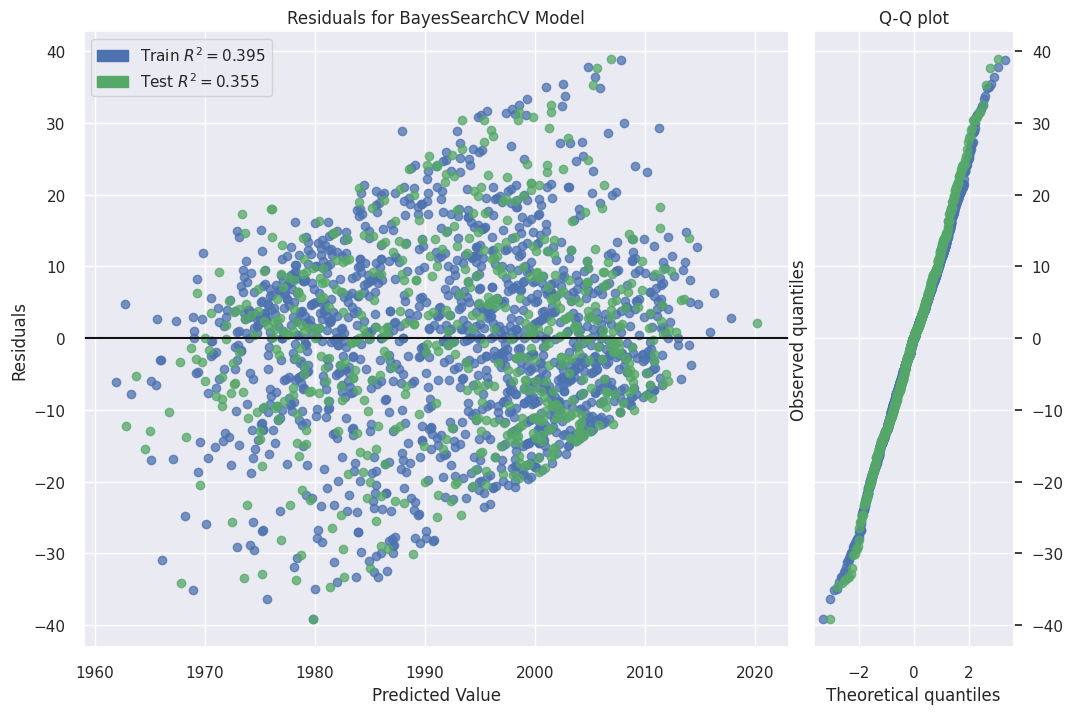

In [16]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lsvm, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### SVM Quadràtic

In [17]:
param = {'C':10**np.linspace(-3,3,101), 'epsilon':np.linspace(0,0.01,11)}

qsvr = SVR(kernel='poly', degree=2)
qsvm = BayesSearchCV(qsvr, param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_qsvm = qsvm.predict(x_test)
r2_qsvm_train = np.mean(cross_val_score(qsvm, x_train, y_train))
r2_qsvm_test = np.mean(cross_val_score(qsvm, x_test, y_test))

print(f'Train R2 score: {r2_qsvm_train}')
print(f'Test R2 score: {r2_qsvm_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_qsvm))))

Train R2 score: 0.40970272314569733
Test R2 score: 0.3574856281974064
Mitjana d'anys d'error: 12.52463946997923


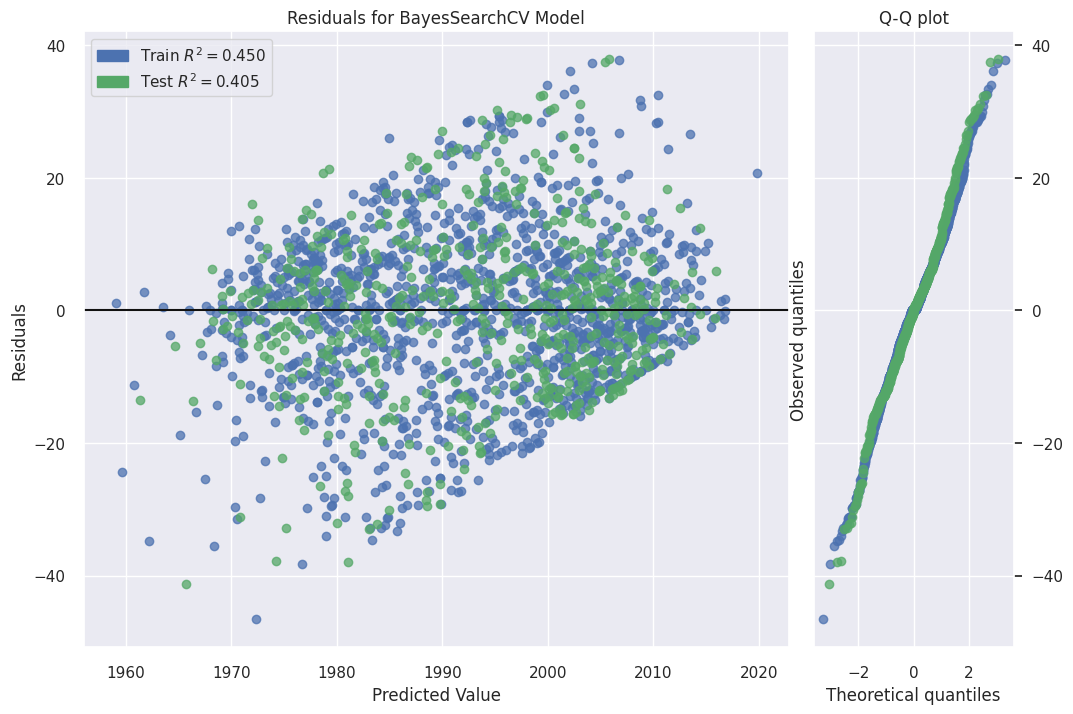

In [18]:
plt.figure(figsize=(12,8));
viz = residuals_plot(qsvm, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### SVM RBF

In [19]:
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto'], 'epsilon':np.linspace(0,0.01,11)}

rbfsvr = SVR(kernel='rbf')
rbfsvm = BayesSearchCV(rbfsvr, param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_rbfsvm = rbfsvm.predict(x_test)
r2_rbfsvm_train = np.mean(cross_val_score(rbfsvm, x_train, y_train))
r2_rbfsvm_test = np.mean(cross_val_score(rbfsvm, x_test, y_test))

print(f'Train R2 score: {r2_rbfsvm_train}')
print(f'Test R2 score: {r2_rbfsvm_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_rbfsvm))))

Train R2 score: 0.4097415942815593
Test R2 score: 0.37547536799503983
Mitjana d'anys d'error: 12.443692778026907


In [20]:
plt.figure(figsize=(12,8));
viz = residuals_plot(rbfsvm, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor


param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'criterion':['squared_error', 'poisson'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10]}

rforest = BayesSearchCV(RandomForestRegressor(), param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_rforest = rforest.predict(x_test)
r2_rforest_train = np.mean(cross_val_score(rforest, x_train, y_train))
r2_rforest_test = np.mean(cross_val_score(rforest, x_test, y_test))

print(f'Train R2 score: {r2_rforest_train}')
print(f'Test R2 score: {r2_rforest_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_rforest))))

Train R2 score: 0.43709549700490075
Test R2 score: 0.40981517908196796
Mitjana d'anys d'error: 12.046641731247506


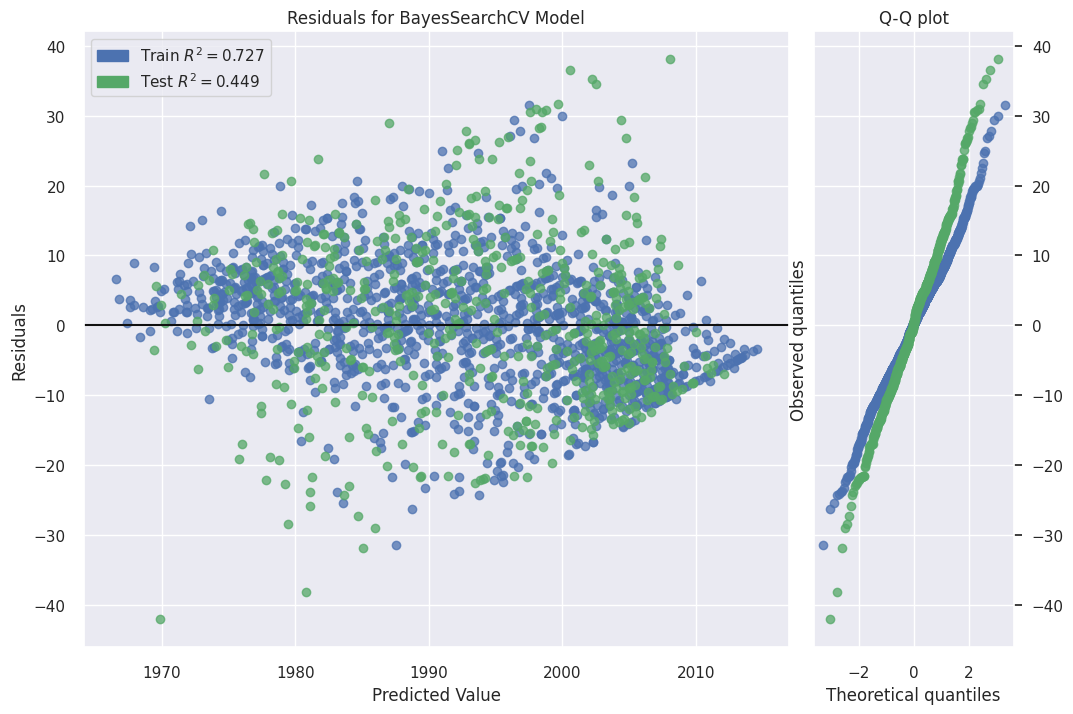

In [22]:
plt.figure(figsize=(12,8));
viz = residuals_plot(rforest, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);